# Clustering and Dimensionality Reduction

<a href="?print-pdf">print view</a>  
<a href="ClusteringAndDimensionalityReduction.ipynb" download>notebook</a>

# What is clustering?

> ## Grouping similar objects together based on features describing the objects.
> > ### It is used in a lot of different fields.
> > > #### (e.g. biology, medicine, astronomy, finance, geology, climatology, ...)


# Why is clustering important in computational biology?

> ## - Grouping genes, proteins, cells into groups based on expression, structural, or functional similarities.
> ## - Discovering patterns
> ## - Pre-processing step in downstream stream computational analysis.


# Assumptions behind clustering
> ## - Biological data has inherent organization and pattern
> ## - Assumption: Similar objects within the data that have similar organization/patterns.
> ## - Goal: Use mathematics and computation to leverage this similarity and group the objects together.

# Let's start with a classical example: IRIS dataset

**The IRIS dataset contains measurements of 150 iris flowers from 3 species:**
> - Setosa
> - Versicolor  
> - Virginica

**Each flower has 4 features:**
> - Sepal length (cm)
> - Sepal width (cm)
> - Petal length (cm)
> - Petal width (cm)

In [153]:
import pandas as pd
from sklearn.datasets import load_iris

# Load IRIS dataset
iris = load_iris()

In [154]:
X = iris.data # object features
y = iris.target # object labels

feature_names = iris.feature_names
target_names = iris.target_names

In [156]:
print(X[:5,:]) #print first 5 rows of X
print(y) # print object labels

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [157]:
print(X.shape)
print(len(y))
print(feature_names)
print(target_names)

(150, 4)
150
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [159]:
# Create a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names) 

In [89]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [160]:
print(pd.Categorical.from_codes(y, target_names))

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']


<Figure size 500x500 with 0 Axes>

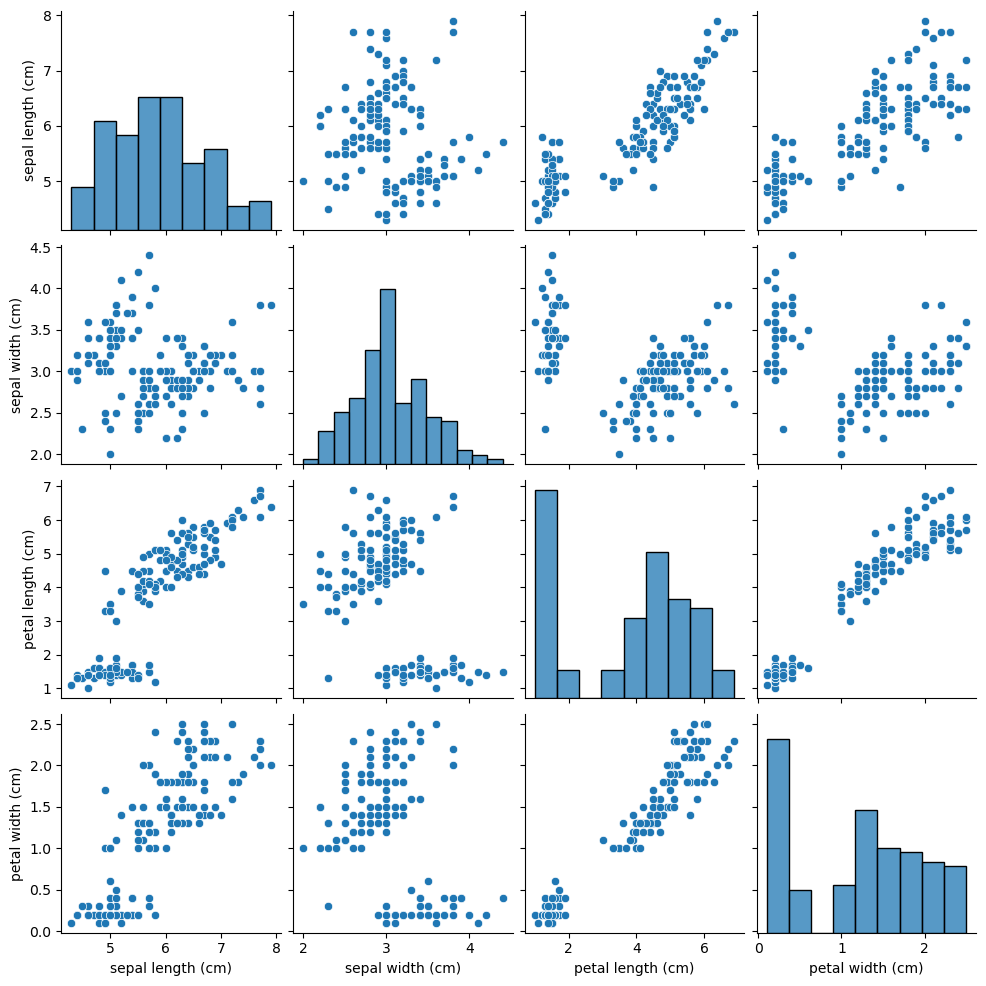

In [118]:
import seaborn as sns
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5, 5))
sns.pairplot(df)

In [161]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, init='random', n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [162]:
cluster_labels_category = pd.Categorical.from_codes(cluster_labels, target_names)
df['cluster'] = cluster_labels_category

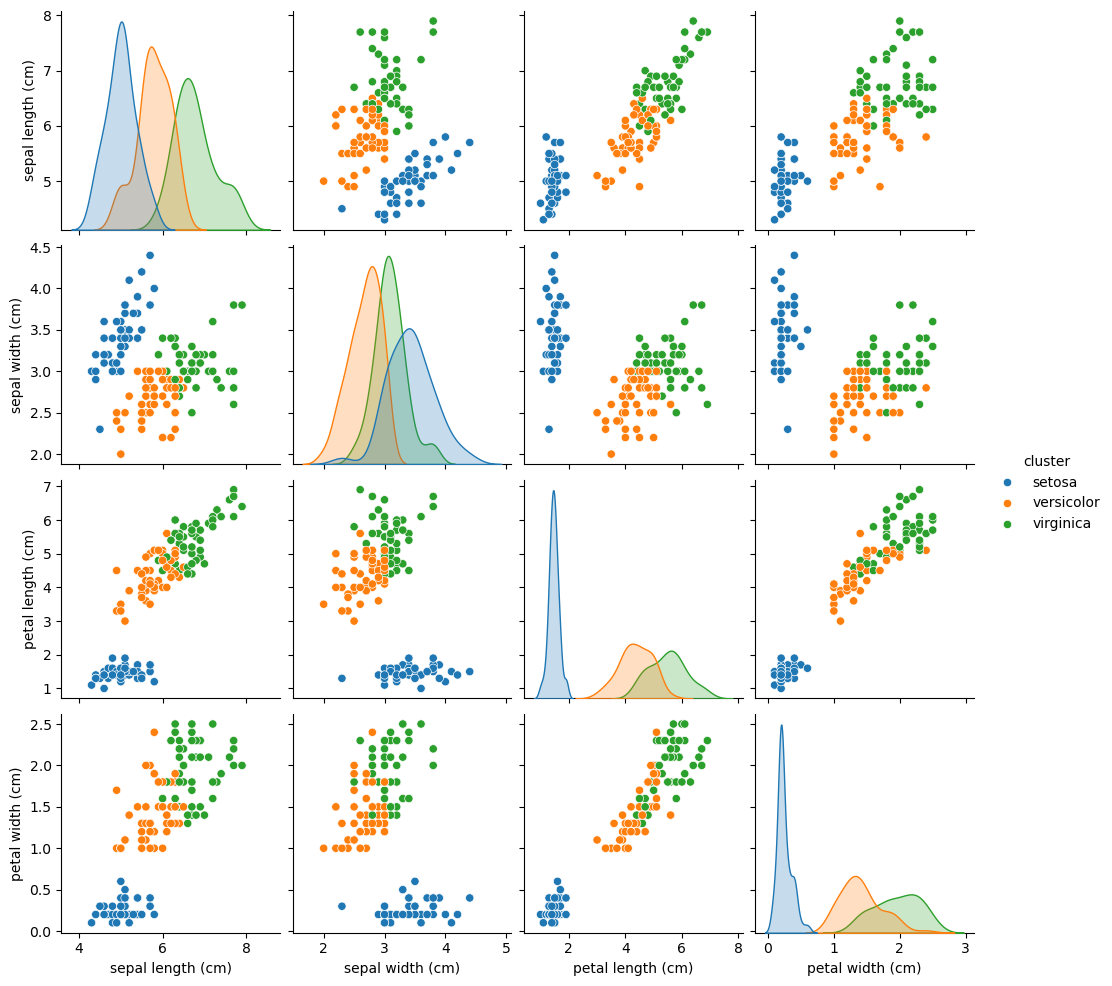

In [163]:
sns.pairplot(df,hue='cluster')

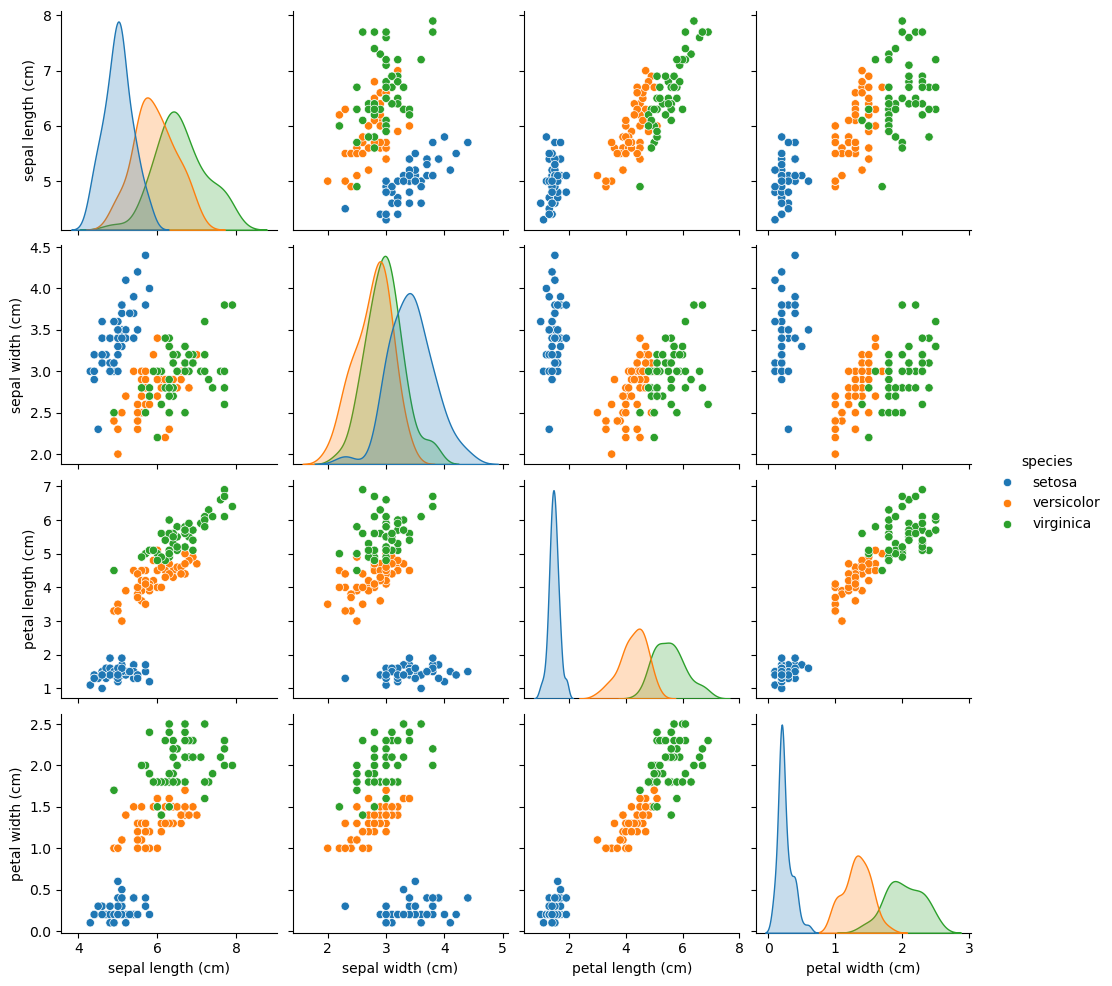

In [164]:
sns.pairplot(df,hue='species')

In [119]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y, cluster_labels)

print("Confusion Matrix:")
print("(Rows = True Species, Columns = Predicted Clusters)\n")
conf_df = pd.DataFrame(conf_matrix, 
                       index=target_names,
                       columns=[f'Cluster {i}' for i in range(3)])

print(conf_df)

Confusion Matrix:
(Rows = True Species, Columns = Predicted Clusters)

            Cluster 0  Cluster 1  Cluster 2
setosa             50          0          0
versicolor          0         38         12
virginica           0         14         36


# Digression into dimesionality reduction

## Representing high-dimensional data using a lower number of features (dimensions) while ensuring that original data’s meaningful properties are still captured

## An Example

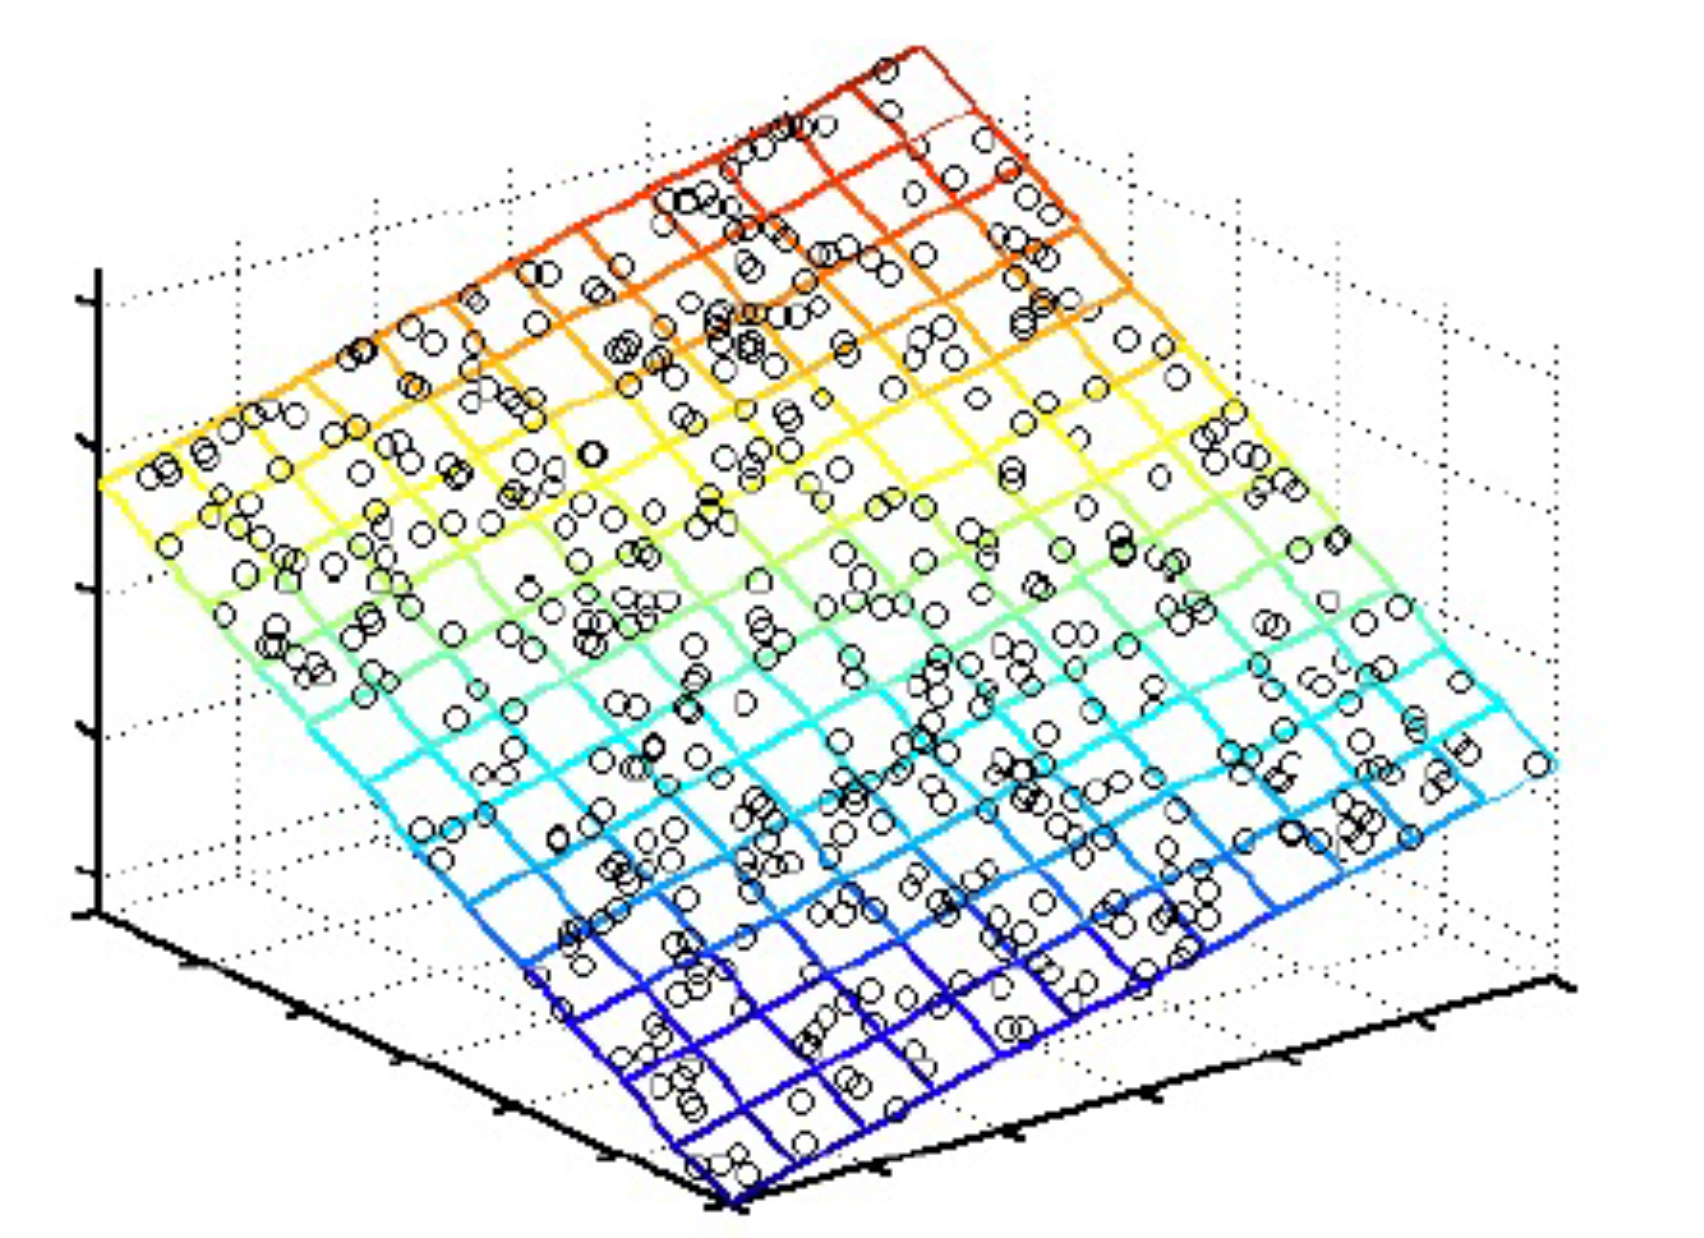


## Principal component analysis finds an orthogonal basis that best represents the variance in the data.

<img width="400" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1280px-GaussianScatterPCA.svg.png">

In [170]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2);
X_pca = pca.fit_transform(X_scaled)
#Get cluster centers in PCA
centers_pca = pca.transform(kmeans.cluster_centers_)

Text(0.5, 1.0, 'Kmeans prediction')

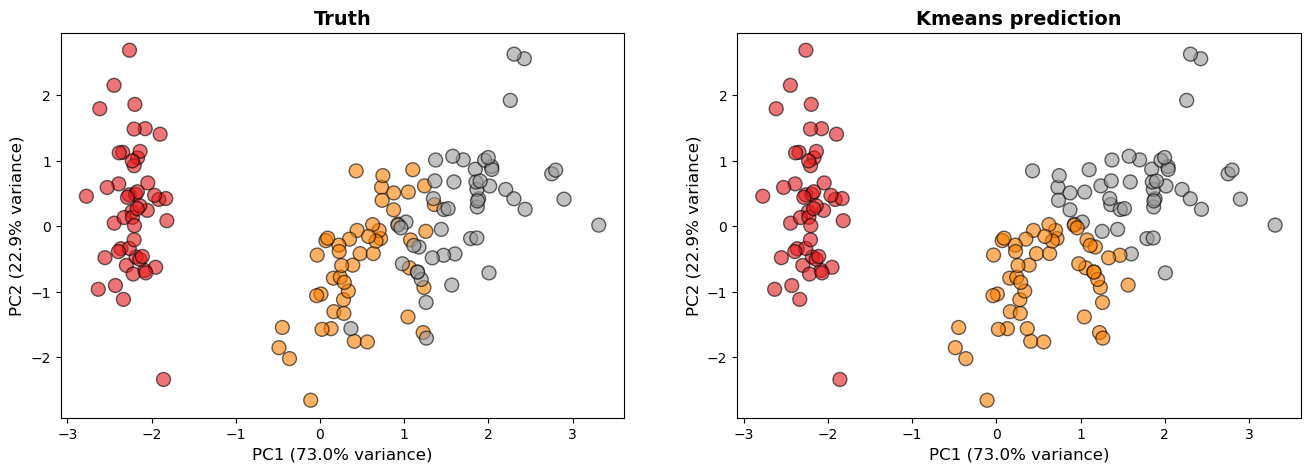

In [165]:
fig, axes = plt.subplots(1,2, figsize = (16,5))
scatter1 = axes[0].scatter(X_pca[:,0],X_pca[:,1], c=y, cmap='Set1', s=100, alpha=0.6, edgecolors='black')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
axes[0].set_title('Truth', fontsize=14, fontweight='bold')


scatter2 = axes[1].scatter(X_pca[:,0],X_pca[:,1], c=cluster_labels, cmap='Set1', s=100, alpha=0.6, edgecolors='black')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
axes[1].set_title('Kmeans prediction', fontsize=14, fontweight='bold')


# So what is PCA doing
> ## Standardize the dataset
> ## Compute covariance matrix
> ## Compute eigenvalues and eigenvectors
> ## Identify the eigenvectors corresponding to the largest two eigenvalues.
> ## Project data on the two eigenvectors.

In [166]:
import numpy as np
# Compute covariance matrix
cov_matrix = np.cov(X_scaled.T)
print(cov_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [167]:
# Step 4: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues[0:2]/eigenvalues.sum()*100)

[72.96244541 22.85076179]


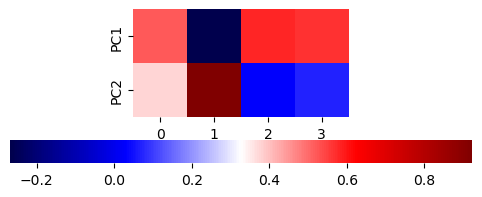

In [168]:
from matplotlib.pylab import cm
plt.figure(figsize=(16,2))
sns.heatmap(pca.components_,cmap=cm.seismic,yticklabels=['PC1','PC2'],
            square=True, cbar_kws={"orientation": "horizontal"});

# Hierarchical clustering 

**Building a tree-like structure - a hierarchy - of clusters**, with

>- Each data point starts as its own cluster (Agglomerative/Bottom-up) OR all points start as one cluster (Divisive/Top-down)
>- Clusters are progressively merged (or split)
>- The result is a nested hierarchy showing relationships at all levels

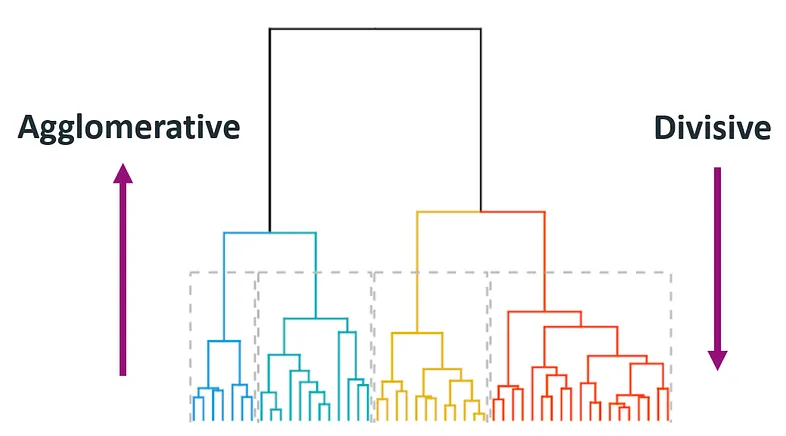

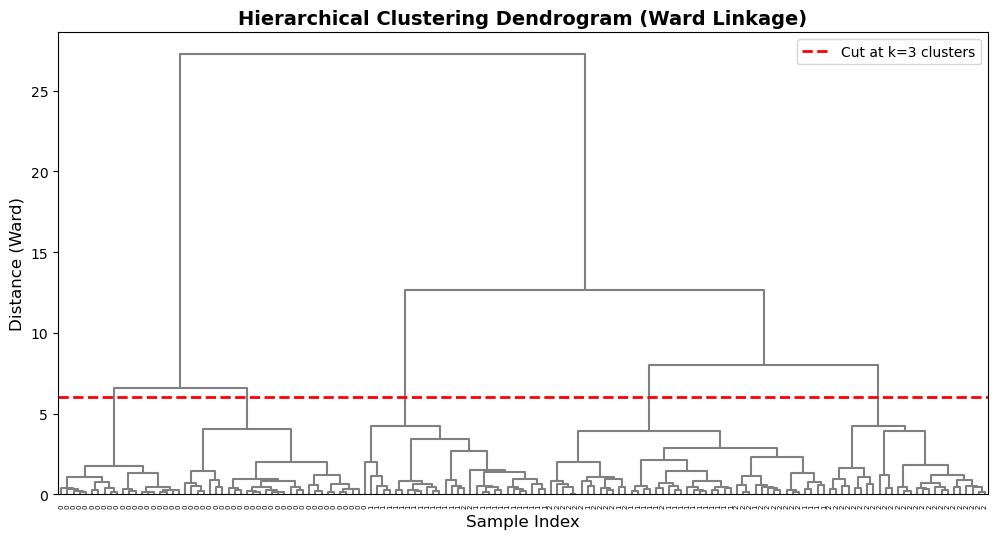

Created 3 clusters
Cluster sizes: [np.int64(49), np.int64(30), np.int64(71)]


In [169]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# 1. Load and standardize IRIS data
iris = load_iris()
X = iris.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Perform hierarchical clustering
Z = linkage(X_scaled, method='ward')

# 3. Cut dendrogram to get 3 clusters
clusters = fcluster(Z, t=3, criterion='maxclust') - 1

# 4. Visualize dendrogram
fig, ax = plt.subplots(figsize=(12, 6))

# Create dendrogram
dendrogram(Z, ax=ax, 
           labels=y,  # Color by true species
           color_threshold=0,
           above_threshold_color='gray')

ax.set_title('Hierarchical Clustering Dendrogram (Ward Linkage)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Sample Index', fontsize=12)
ax.set_ylabel('Distance (Ward)', fontsize=12)

# Add horizontal line showing where we cut for k=3
ax.axhline(y=6, color='red', linestyle='--', linewidth=2, 
           label='Cut at k=3 clusters')
ax.legend(fontsize=10)
plt.show()

print(f"Created {len(set(clusters))} clusters")
print(f"Cluster sizes: {[sum(clusters == i) for i in range(3)]}")

# Class activity

> **Visualize Hierarchical clustering in 2D using PCA**

# Next time

> -**Some more clustering and dimensionality reduction**

> -**RNA seq**